In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
print(train_df.columns.values)

['id' 'timestamp' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material'
 'build_year' 'num_room' 'kitch_sq' 'state' 'product_type' 'sub_area'
 'area_m' 'raion_popul' 'green_zone_part' 'indust_part'
 'children_preschool' 'preschool_quota' 'preschool_education_centers_raion'
 'children_school' 'school_quota' 'school_education_centers_raion'
 'school_education_centers_top_20_raion' 'hospital_beds_raion'
 'healthcare_centers_raion' 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25'
 'culture_objects_top_25_raion' 'shopping_centers_raion' 'office_raion'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'full_all' 'male_f'
 'female_f' 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all' '0_6_male'
 '0_6_female' '7_14_all' '7_14_male' 

In [6]:
mac_df = pd.read_csv('macro.csv')

In [7]:
mac_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [8]:
train_df.shape

(30471, 292)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [10]:
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(173)
memory usage: 67.9 MB


In [12]:
#from collections import Counter
#Counter(train_df.full_sq)

In [13]:
Y_train = train_df["price_doc"]
X_train = train_df.drop(["id", "timestamp", "price_doc"], axis=1)

In [14]:
X_train.shape

(30471, 289)

In [15]:
#將object類型的data轉為int
for f in test_df.columns:
    if test_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_df[f].values)) 
        test_df[f] = lbl.transform(list(test_df[f].values))

In [16]:
X_test = test_df.drop(["id", "timestamp"], axis=1)

## RandomForest

In [15]:
# X_train = X_train.dropna(
#     axis=1,     # 0: 对行进行操作; 1: 对列进行操作
#     how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
#     ) 

In [31]:
type(X_train.iloc[0,4])

numpy.float64

In [32]:
X_train.isnull().sum() 

full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota                              6685
school_education_centers_raion               0
school_educat

In [33]:
rf = RandomForestRegressor(n_estimators=10,n_jobs=2)
rf.fit(X_train, Y_train)
importances = rf.feature_importances_
print(importances)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [34]:
features = X_train.columns.values

In [35]:
indices = np.argsort(-importances)

In [36]:
top_20 = indices[0:19]

In [37]:
top_20

array([  0, 210, 205, 185, 229, 221, 217,  98,  69,  74,  73,  91,  61,
        85,  64,  55, 139, 114,  71])

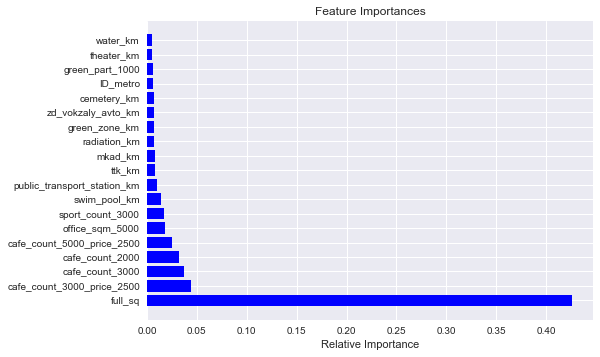

In [38]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(top_20)), importances[top_20], color='b', align='center')
plt.yticks(range(len(top_20)), features[top_20])
plt.xlabel('Relative Importance')
plt.show()

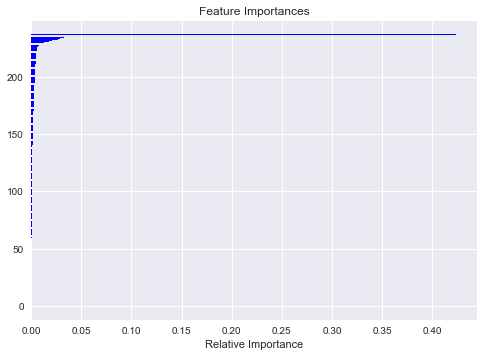

In [21]:
plt.show()